In this notebook, I construct a class to perform simple linear regression from scratch. I then show examples of how to use the different methods of the class, and finally, I compare its perfomance with the built-in lninear regression of the scikit-learn library. We find very similar performances between the home-made and scikit-learn versions!

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# 1. Home-made linear regression class

In [2]:
class LinRegSimple:
    """
    A simple linear regression model implemented from scratch using gradient descent.

    Attributes:
        w (float): Weight (slope) of the linear regression model.
        b (float): Bias (intercept) of the linear regression model.
        x_min (float): Minimum value of the input feature (used for normalization).
        x_max (float): Maximum value of the input feature (used for normalization).
        y_min (float): Minimum value of the target variable (used for normalization).
        y_max (float): Maximum value of the target variable (used for normalization).
    """
    
    def __init__(self):
        """
        Initializes the LinRegSimple class. Sets all parameters to None initially.
        """
        self.w = None
        self.b = None
        self.x_min = None
        self.x_max = None
        self.y_min = None
        self.y_max = None

    def normalize(self, x_train, y_train):
        """
        Normalizes the input features and target variables to the range [0, 1].

        Args:
            x_train (numpy.ndarray): The input feature values (1D or 2D array).
            y_train (numpy.ndarray): The target variable values (1D or 2D array).

        Returns:
            tuple: Normalized x_train and y_train as 1D arrays.
        """
        # Flatten input arrays to ensure they are 1D
        x_train = x_train.flatten()
        y_train = y_train.flatten()
        self.x_min, self.x_max = np.min(x_train), np.max(x_train)
        self.y_min, self.y_max = np.min(y_train), np.max(y_train)

        # Add a small epsilon to avoid division by zero
        epsilon = 1e-8

        # Normalize the data to range [0, 1].
        x_train = (x_train - self.x_min) / (self.x_max - self.x_min + epsilon)
        y_train = (y_train - self.y_min) / (self.y_max - self.y_min + epsilon)

        return x_train, y_train

    def cost_function(self, w, b, x_train, y_train):
        """
        Computes the cost function (Mean Squared Error) for the linear regression model.

        Args:
            w (float): The current weight of the model.
            b (float): The current bias of the model.
            x_train (numpy.ndarray): Normalized input feature values (1D array).
            y_train (numpy.ndarray): Normalized target variable values (1D array).

        Returns:
            float: The value of the cost function.
        """
        return (1 / 2) * np.mean((w * x_train + b - y_train) ** 2)

    def train(self, x_train, y_train, alpha, w_0=0., b_0=0., iter=10000):
        """
        Trains the linear regression model using gradient descent.

        Args:
            x_train (numpy.ndarray): The input feature values (1D or 2D array).
            y_train (numpy.ndarray): The target variable values (1D or 2D array).
            alpha (float): The learning rate for gradient descent.
            w_0 (float, optional): Initial weight for the model. Default is 0.0.
            b_0 (float, optional): Initial bias for the model. Default is 0.0.
            iter (int, optional): Number of iterations for gradient descent. Default is 10,000.

        Returns:
            tuple: Final weight (w) and bias (b) of the trained model.
        """
        x_train, y_train = self.normalize(x_train, y_train)
        w = w_0
        b = b_0
        m = x_train.shape[0] 

        # Gradient descent.
        for i in range(iter):
            dcost_dw = (1 / m) * np.dot((w * x_train + b - y_train), x_train)
            dcost_db = np.mean(w * x_train + b - y_train)
            w = w - alpha * dcost_dw
            b = b - alpha * dcost_db
            
        # Scale the parameters back to the original data range.
        x_scale = self.x_max - self.x_min
        y_scale = self.y_max - self.y_min
        self.w = w * (y_scale / x_scale)
        self.b = (b * y_scale) + self.y_min - self.w * self.x_min

        return self.w, self.b
    
    def learning_curve(self, alpha_min, alpha_max, x_train, y_train, iter=1000):
        """
        Plots the learning curves (cost vs. iterations) for multiple values of the learning rate (alpha).

        Args:
            alpha_min (float): Minimum value of the learning rate.
            alpha_max (float): Maximum value of the learning rate.
            x_train (numpy.ndarray): Input feature values (1D or 2D array).
            y_train (numpy.ndarray): Target variable values (1D or 2D array).
            iter (int, optional): Number of iterations for gradient descent. Default is 10,000.
        """
        x_train, y_train = self.normalize(x_train, y_train)
        m = x_train.shape[0] 
        alphas = np.linspace(alpha_min, alpha_max, 4)

        for alpha in alphas:
            w = 0.  
            b = 0. 
            cost_vec = [] 

            for i in range(iter):
                dcost_dw = (1 / m) * np.dot((w * x_train + b - y_train), x_train)
                dcost_db = np.mean(w * x_train + b - y_train)
                w = w - alpha * dcost_dw
                b = b - alpha * dcost_db
                cost_vec.append(self.cost_function(w, b, x_train, y_train))

            plt.plot(range(iter), cost_vec, label=f"alpha={alpha:.2e}")

        plt.xlabel("Iterations")
        plt.ylabel("Cost function")
        plt.title("Learning curves for different learning rates")
        plt.legend()
        plt.grid(True)
        plt.show()

    def train_and_plot(self, x_train, y_train, alpha):
        """
        Trains the linear regression model on the provided training data using a specified
        learning rate (alpha) and plots the original data points along with the fitted line.

        Args:
            x_train (numpy.ndarray): The input feature values (1D array).
            y_train (numpy.ndarray): The target variable values (1D array).
            alpha (float): The learning rate for training the model.

        Visualization:
            - The data points are plotted with the label "Data points" in blue.
            - The fitted line is plotted with the label "Fitted curve" in black.
            - A legend, grid, and display are added for better visualization.
        """
        w, b = self.train(x_train, y_train, alpha)
        f = w * x_train + b
        plt.plot(x_train, y_train, 'o', label='Data points', color='blue') 
        plt.plot(x_train, f, '-', label='Fitted curve', color='black') 
        plt.legend() 
        plt.grid(True)  
        plt.show()  

    def predict(self, x):
        """
        Makes predictions for data using the parameters found after training.

        Args:
            x (numpy.ndarray): Input values to make predictions.

        Returns:
            numpy.ndarray: Predictions.
        """
        x = x.flatten()
        return self.w * x +self.b

# 2. Generation of training and test sets and implementation example

In [3]:
# Dataset generation and split into training and test sets.
X, y = make_regression(n_samples=100, n_features=1, noise=30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

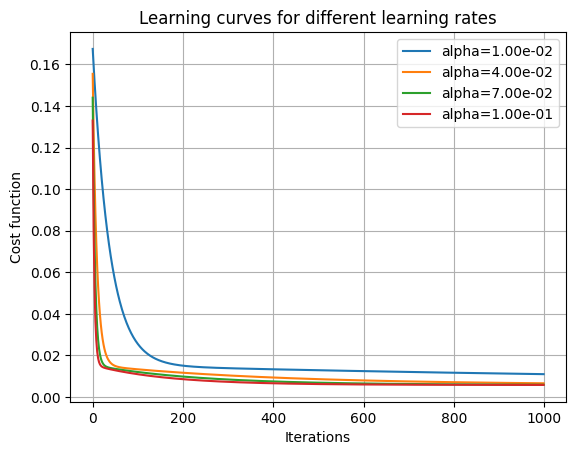

In [4]:
my_model = LinRegSimple() # Create the model.
my_model.learning_curve(0.01, 0.1, X_train, y_train) # Look at learning curves to select learning rate.

In [5]:
my_model.train(X_train, y_train, 0.1) # Train the model.
print(f'The weight/slope of the model is {my_model.w:.3f} and the bias is {my_model.b:.3f}.') # Display parameters

The weight/slope of the model is 49.250 and the bias is 0.298.


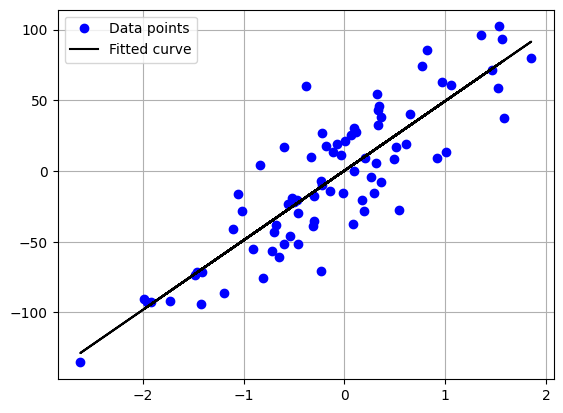

In [6]:
my_model.train_and_plot(X_train, y_train, 0.1)

In [7]:
my_pred_y = my_model.predict(X_test) # Make predictions of test data.
my_pred_y 

array([-65.11595546,  73.0844599 ,  40.31484477, -19.01379526,
       -11.23446778, -14.06835116, -22.63968456, -86.53267064,
        40.7766496 ,  46.16353496,  51.07475008,  17.88558461,
       -59.82930518, -25.79320638, -56.38916494, -23.30183006,
        48.34360192,  12.21439251,  36.66740146,  18.8009243 ])

In [8]:
y_test

array([-35.96734513, 143.72158835,  65.39614363,  15.0001093 ,
        -3.3256546 ,  29.59415453, -49.21765775, -57.79779114,
        38.68297046,  74.59447456,  -0.16618894,  31.04507178,
       -24.75167479, -20.85337187, -72.09857368, -13.21261185,
        77.23245092,  13.17020193,  46.91448857,  57.20252024])

In [9]:
my_error = np.sqrt(mean_squared_error(y_test, my_pred_y)) # Compute root-mean-squared deviation.
my_error

30.62384740288186

# 3. Comparison to scikit-learn

In [10]:
model_sklearn = LinearRegression() # Create the model.
model_sklearn.fit(X_train, y_train) # Train the model.
y_pred = model_sklearn.predict(X_test) # Make predictions.
print(f'The weight/slope of the model is {model_sklearn.coef_[0]:.3f} and the bias is {model_sklearn.intercept_:.3f}.')

The weight/slope of the model is 49.250 and the bias is 0.298.


In [11]:
y_pred

array([-65.1159556 ,  73.08445946,  40.3148444 , -19.01379551,
       -11.23446804, -14.06835141, -22.63968479, -86.53267074,
        40.77664923,  46.16353458,  51.07474968,  17.88558429,
       -59.82930533, -25.7932066 , -56.3891651 , -23.30183029,
        48.34360153,  12.2143922 ,  36.6674011 ,  18.80092398])

In [12]:
sklear_error = np.sqrt(mean_squared_error(y_test, y_pred)) # Compute root-mean-squared deviation.
sklear_error

30.62384755034599

# 4. Areas of improvement

Even though the home-made linear regression class shows very good results, it would be interesting to play around a bit with the class and also incorporate regularization as well as the freedom to use arbitrary cost functions. To the latter end, it would be nice to develop a gradient descent algorithm that computes gradients of arbitrary functions using a library such as JAX, which is very powerful and allows for parallelization.